# Plot learning curves in python

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("C:\\Users\\jarek\\Documents\\GitHub\\Learning_Curves\\learning_curve_data.txt", sep = ';')

In [63]:
data.describe()

,year,month,week_of_year,day_of_week,traffic,outdoor,radio,internet,komunikacja,event,temp,cisnienie
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,2015.869892,6.012903,24.233333,3.983871,19763.752688,674.225129,247.887796,195.796462,23.579484,1111.814925,14.566667,1003.152355
std,0.778656,3.305383,14.263640,1.989412,3020.526456,241.612164,455.176333,377.105117,74.880876,5545.313772,9.185703,8.330808
min,2015.000000,1.000000,1.000000,1.000000,9901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,971.920000
25%,2015.000000,3.000000,12.000000,2.000000,18897.000000,525.810000,0.000000,0.000000,0.000000,0.000000,7.000000,998.250000
50%,2016.000000,6.000000,24.000000,4.000000,20336.500000,676.130000,0.000000,0.000000,0.000000,483.870000,14.000000,1003.250000
75%,2016.000000,9.000000,35.000000,6.000000,21485.750000,801.000000,441.980000,399.960000,0.000000,953.467500,22.000000,1008.590000
max,2017.000000,12.000000,53.000000,7.000000,29396.000000,1396.450000,2352.320000,5778.180000,264.000000,80500.000000,36.000000,1028.250000


In [70]:
X = data.drop(data.columns[[4]],axis = 1)
y = data['traffic']

## Define plot_learning_curve

In [65]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



## Linear regression model

<module 'matplotlib.pyplot' from 'c:\\users\\jarek\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

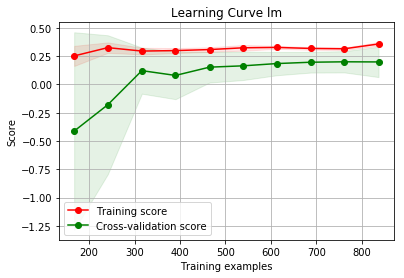

In [64]:
from sklearn.model_selection import learning_curve
from sklearn import linear_model

# Create linear regression object
lm = linear_model.LinearRegression()

# Plot Learning Curve for linear regression model
title = "Learning Curve lm"
plot_learning_curve(lm, title, X, y, ylim=None, cv=10,train_sizes=np.linspace(.2, 1.0, 10))


In [54]:
lm.score(X,y)

0.35566263392235464

## Random forest model

<module 'matplotlib.pyplot' from 'c:\\users\\jarek\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

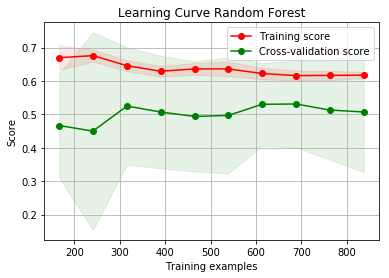

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state = 0)

title = "Learning Curve Random Forest"

plot_learning_curve(rf, title, X, y, ylim=None, cv=10,train_sizes=np.linspace(.2, 1.0, 10))


In [72]:
rf.fit(X,y)
rf.score(X,y)

0.61834271207752933

<module 'matplotlib.pyplot' from 'c:\\users\\jarek\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

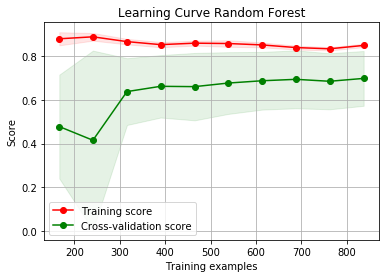

In [69]:
rf2 = RandomForestRegressor(max_depth=5, random_state = 0)

title = "Learning Curve Random Forest"

plot_learning_curve(rf2, title, X, y, ylim=None, cv=10,train_sizes=np.linspace(.2, 1.0, 10))

In [73]:
rf2.fit(X,y)
rf2.score(X,y)

0.84779132191509843